<a href="https://colab.research.google.com/github/Robin-Rego/Mobile-price-range-prediction/blob/main/Robin_Rego_Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
 actual price but a price range indicating how high the price is**

**Data Description -**


Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter-Project/Mobile Price Range Prediction-Classification ML/data_mobile_price_range (1).csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
df.shape

(2000, 21)

From this we can see that the dataset is a combination of 2000 Rows and 21 Columns

#**Data Cleaning**

In [ ]:
#Let's check for Null Values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

NOTE:
* The minimum value of sc_width and px_height is 0. which is not possible in any mobile. We need to handle this mismatch.

In [ ]:
# Let's check the numbers of screen width with value as 0.
print(df[df['sc_w']==0].shape[0])

In [ ]:
# Let's check the numbers of px_hieght with value as 0.
print(df[df['px_height']==0].shape[0])

In [ ]:
# As there are only 2 observations having px_height=0. so we will drop it.
df = df[df['px_height']!=0]

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

#**KNN Imputer**

In [ ]:
# import library
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [ ]:
# Checking shape
df.shape

In [ ]:
# Let's check if sc_w has value 0.
df[df['sc_w']==0].shape[0]

As we can see there are no null values.

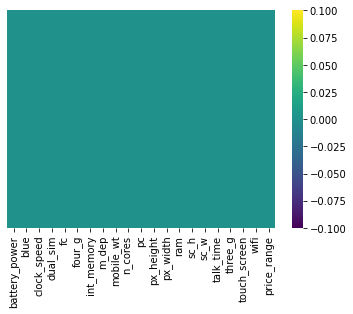

In [ ]:
# Let's plot a heatmap to check the Nan values
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#**Data Analyzing**

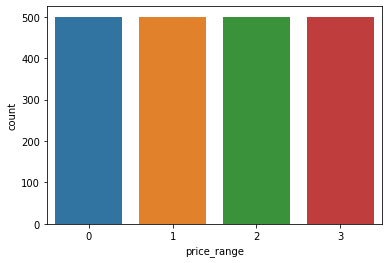

In [ ]:
sns.countplot(x = "price_range", data = df)
#0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
battery_power_2 = df['battery_power'].unique()
print(battery_power_2)

[ 842 1021  563 ... 1139 1467  858]


In [ ]:
len(battery_power_2)

1094

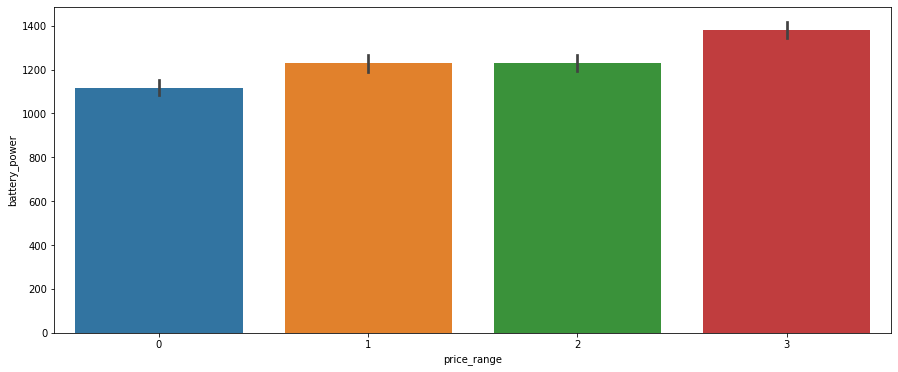

In [ ]:
# Let's check the Price_Range with Battery
plt.figure(figsize=(15,6))
sns.barplot(x = "price_range",y = "battery_power", data = df)

So as we can see that as the battery power increases there is increase in the price range of mobile.
NOTE: Mobiles of 1(medium cost) and 2(high cost) have almost the same battery power

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

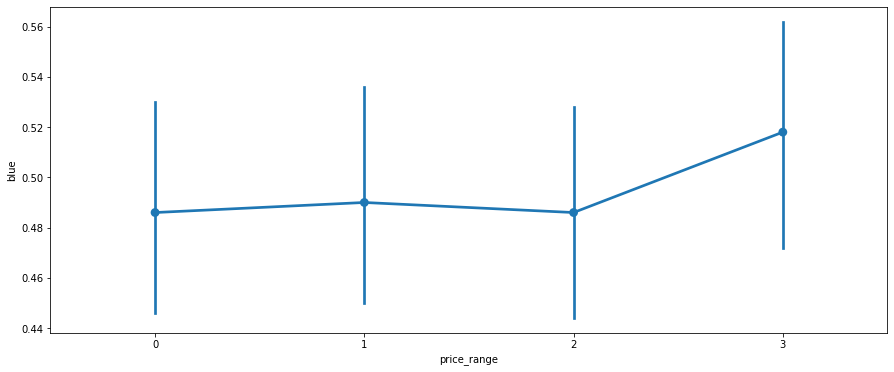

In [ ]:
# Let's check the Price_Range with Blue
plt.figure(figsize=(15,6))
sns.pointplot(x = "price_range",y = "blue", data = df)

([<matplotlib.patches.Wedge at 0x7f64d152f090>,
 [Text(-1.0998642959886566, -0.01727803256672628, 'Bluetooth Supported'),
  Text(1.0998642959886566, 0.017278032566726147, 'Not supported')],
 [Text(-0.5999259796301762, -0.009424381400032515, '50.5%'),
  Text(0.5999259796301762, 0.009424381400032442, '49.5%')])

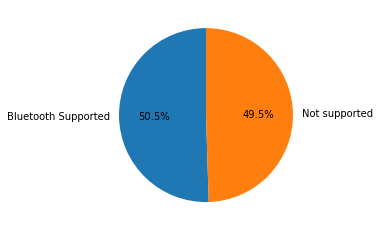

In [ ]:
#Let's check the percentage of phone that support Bluetooth
labels = ["Bluetooth Supported",'Not supported']
values=df['blue'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['blue'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

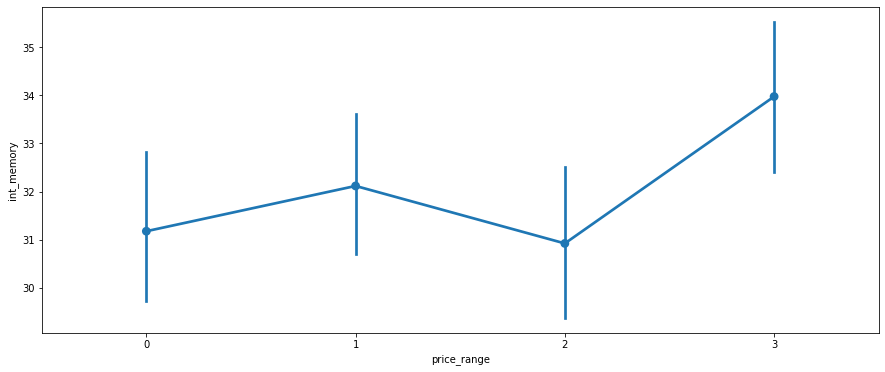

In [ ]:
# Let's check the Price_Range with int_memory
plt.figure(figsize=(15,6))
sns.pointplot(x = 'price_range', y="int_memory", data=df)

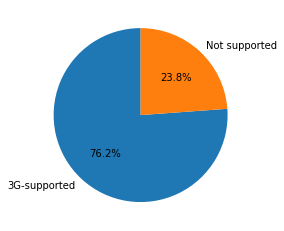

In [ ]:
#Let's check the percentage of phone that support 3G
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['three_g'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

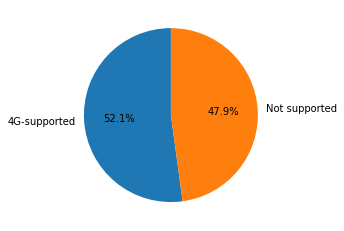

In [ ]:
#Let's check the percentage of phone that support 4G
labels = ["4G-supported",'Not supported']
values=df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['four_g'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

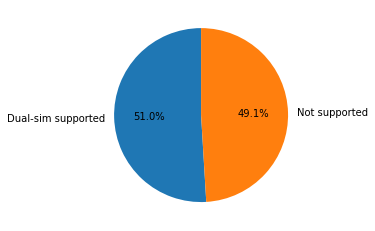

In [ ]:
#Let's check the percentage of phone that support dual sim
labels = ["Dual-sim supported",'Not supported']
values=df['dual_sim'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['dual_sim'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

([<matplotlib.patches.Wedge at 0x7f64d13d6bd0>,
 [Text(-1.0999511451365132, -0.010367174777798756, 'Touch creen mobile'),
  Text(1.0999511441658636, 0.01036727776265717, 'Not a touch screen mobile')],
 [Text(-0.5999733518926434, -0.005654822606072048, '50.3%'),
  Text(0.5999733513631982, 0.005654878779631183, '49.7%')])

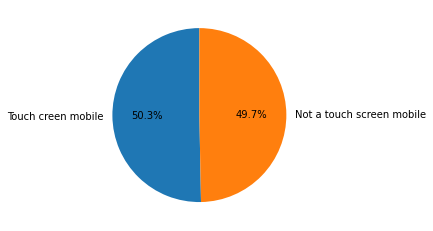

In [ ]:
#Let's check the percentage of phone that support touch screen
labels = ["Touch creen mobile",'Not a touch screen mobile']
values=df['touch_screen'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['touch_screen'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

([<matplotlib.patches.Wedge at 0x7f64d13a4d50>,
 [Text(-1.0997340226703567, -0.024188414195137013, 'wifi supported'),
  Text(1.0997340204056691, 0.024188517159666894, 'Not supported')],
 [Text(-0.5998549214565582, -0.013193680470074732, '50.7%'),
  Text(0.599854920221274, 0.013193736632545578, '49.3%')])

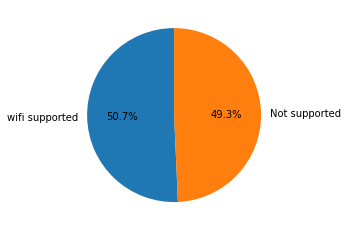

In [ ]:
#Let's check the percentage of phone that support wifi
labels = ["wifi supported",'Not supported']
values=df['wifi'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['wifi'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

In [ ]:
# Numeric Features
numeric_features = df.describe().columns
numeric_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


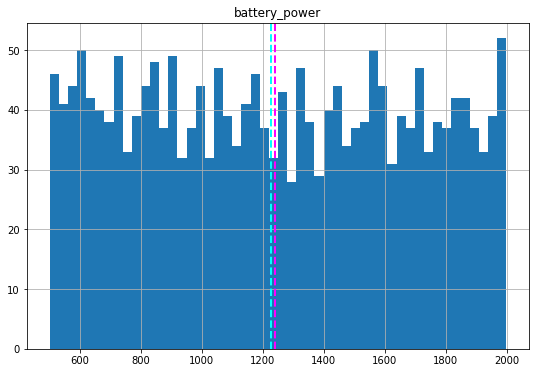

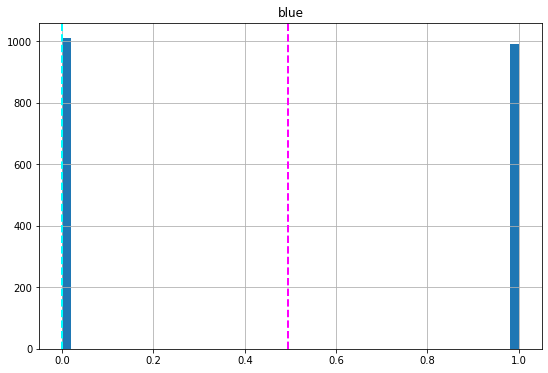

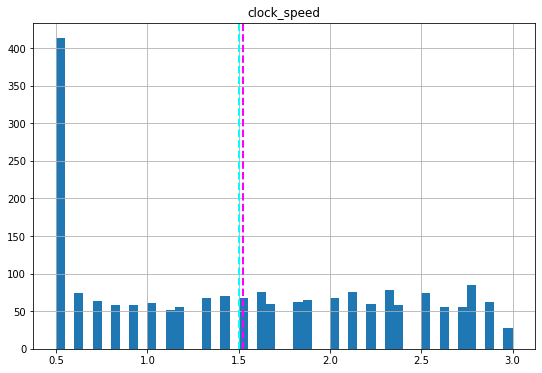

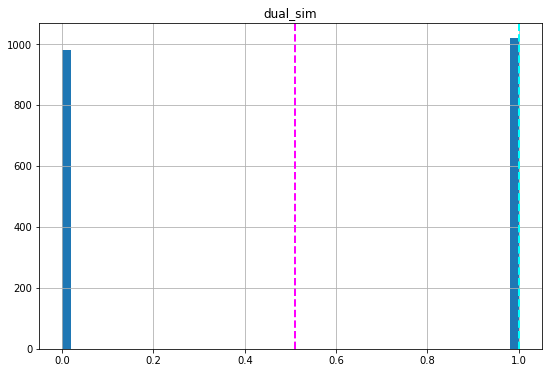

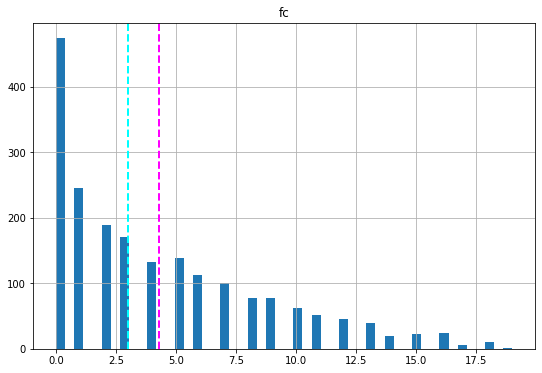

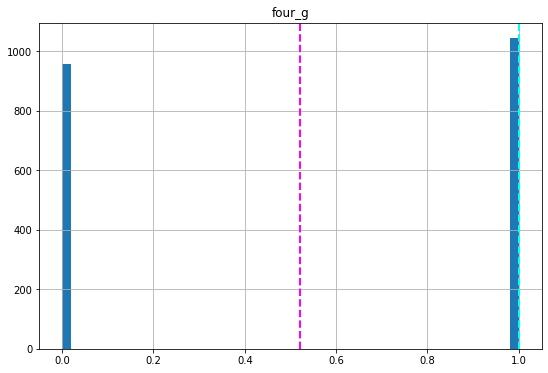

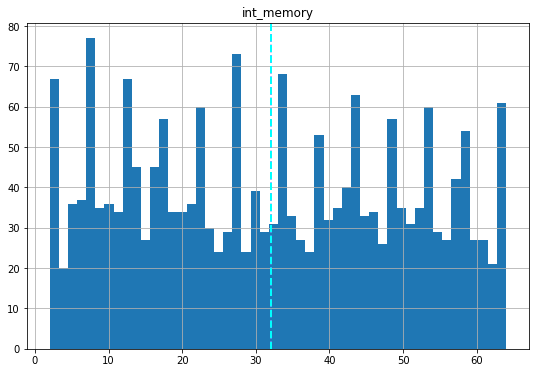

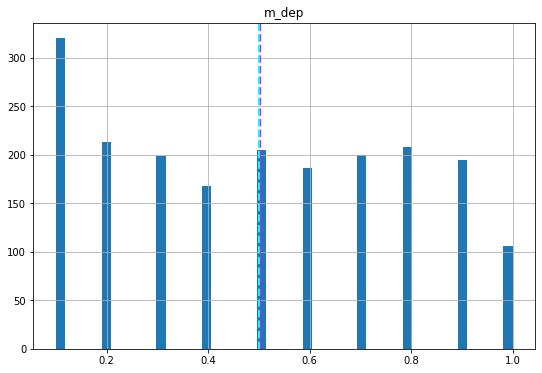

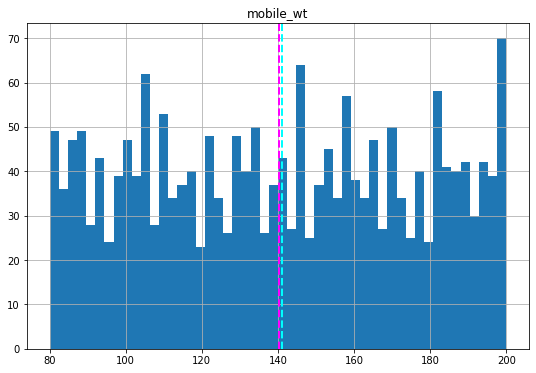

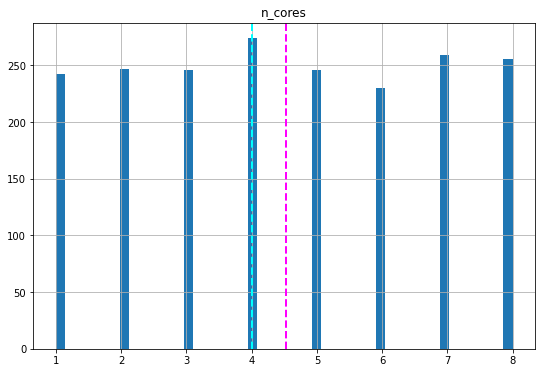

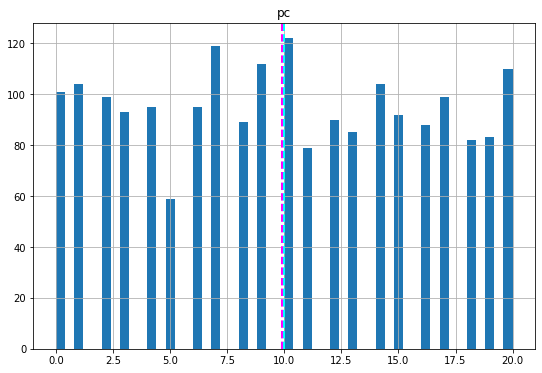

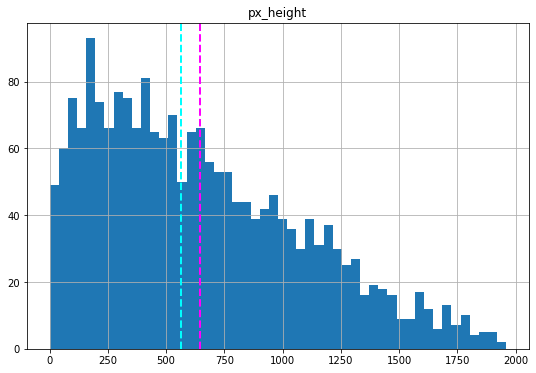

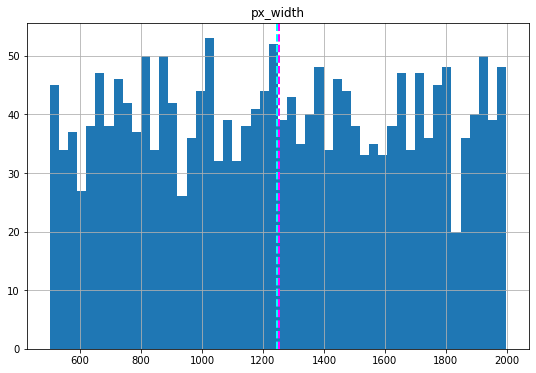

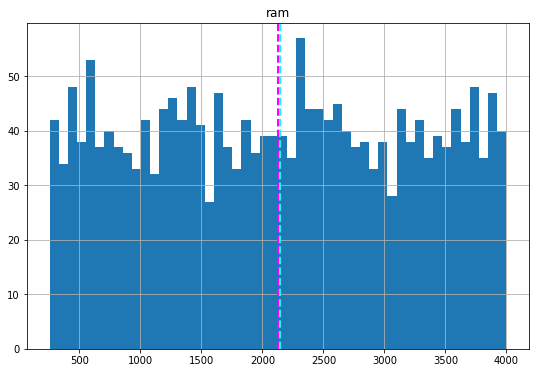

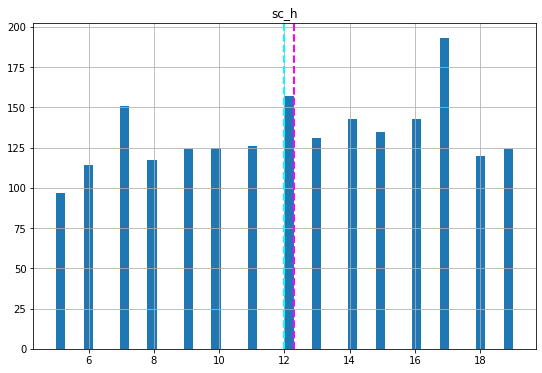

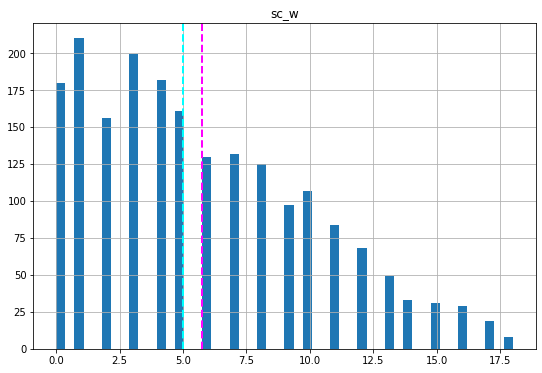

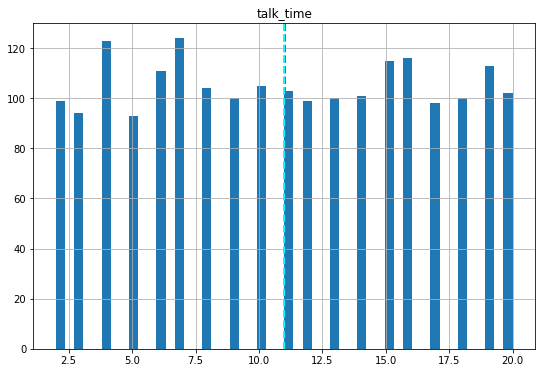

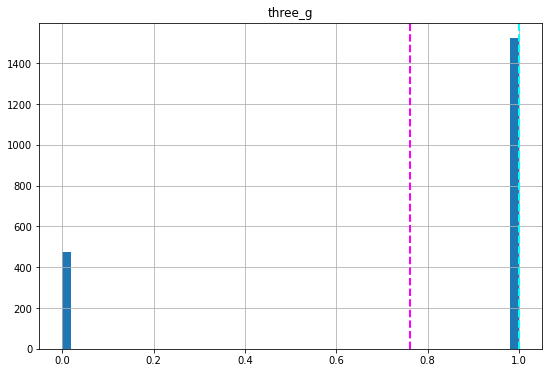

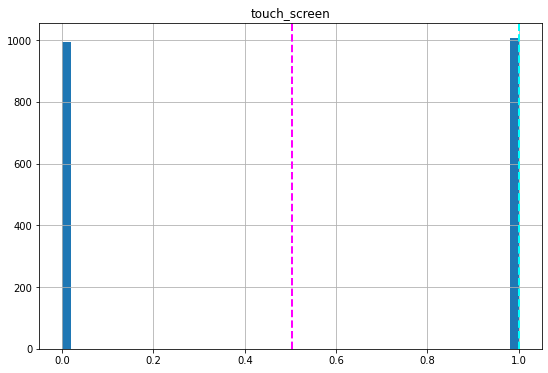

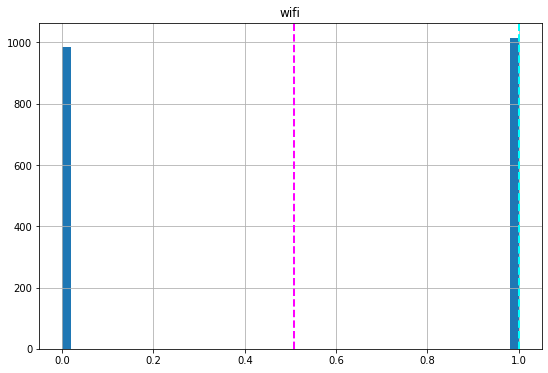

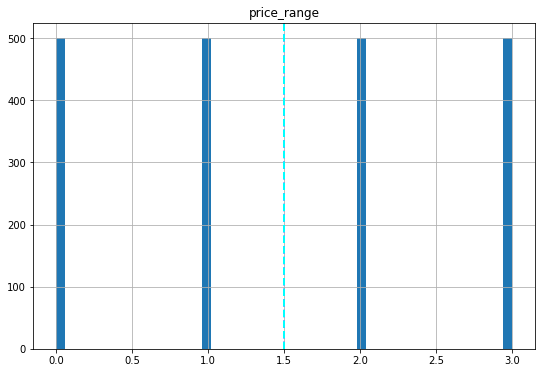

In [ ]:
# Ploting of each numeric features
for col in numeric_features[:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(),color = 'magenta', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(),color = 'cyan', linestyle = 'dashed', linewidth = 2)
  ax.set_title(col)
plt.show()

Since, all the columns in numeric_features except for 'price_range' are independent variables.

Therefore, we do the plotting of the independent variable with 'price_range'.

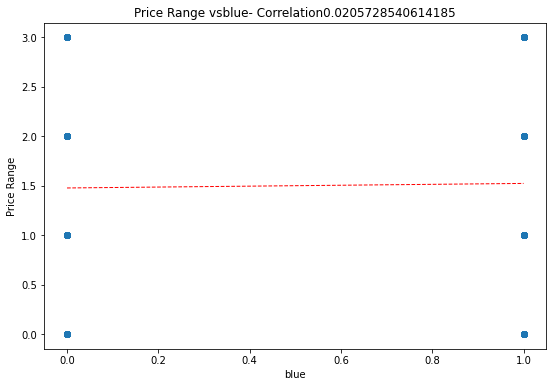

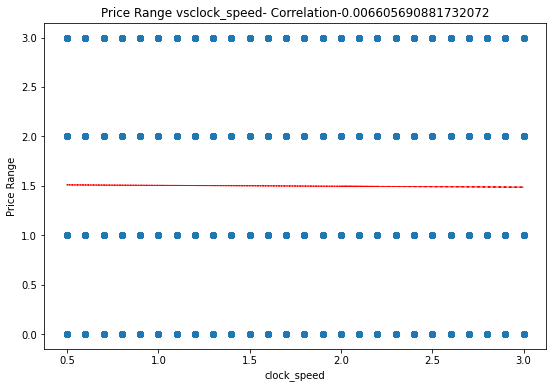

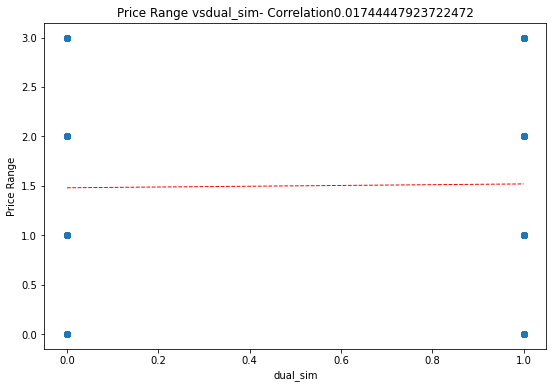

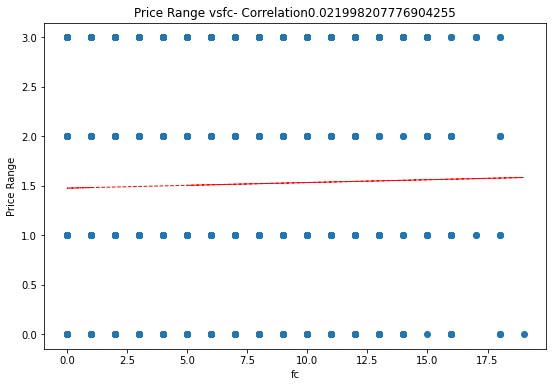

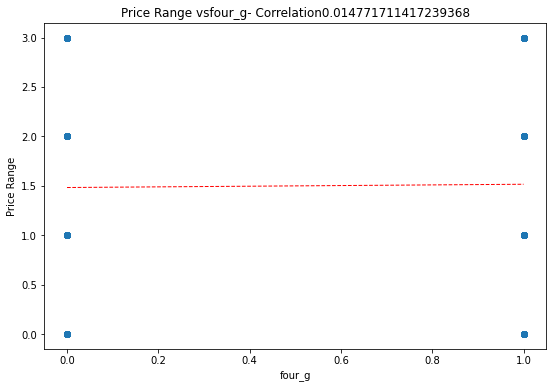

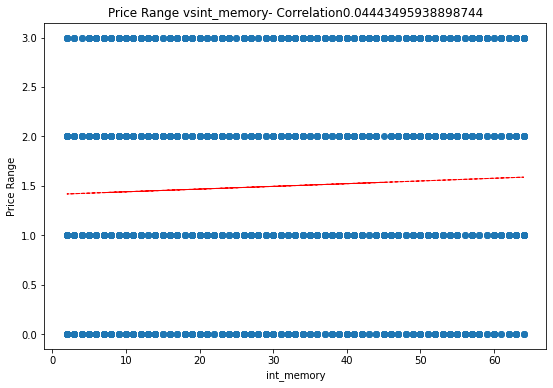

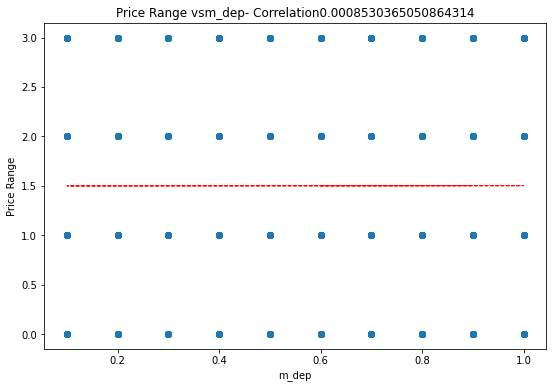

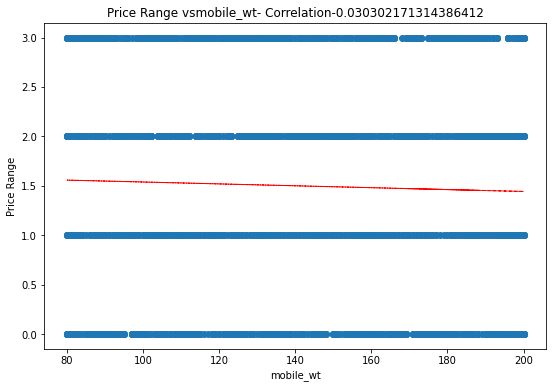

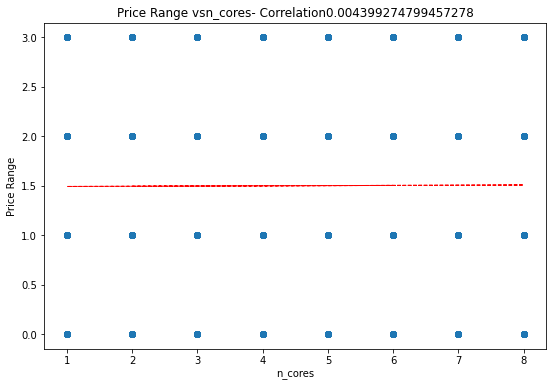

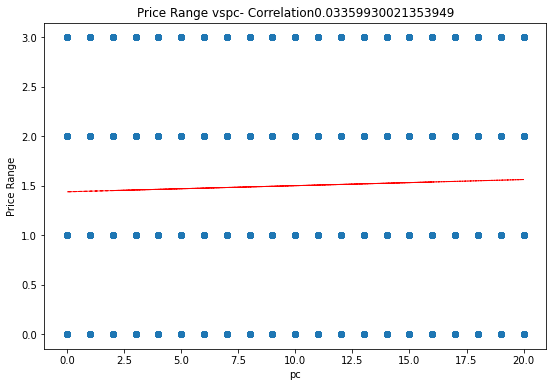

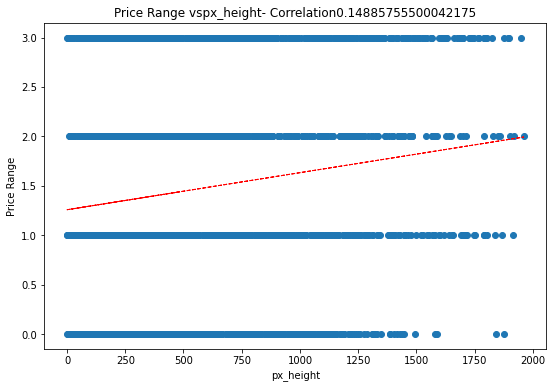

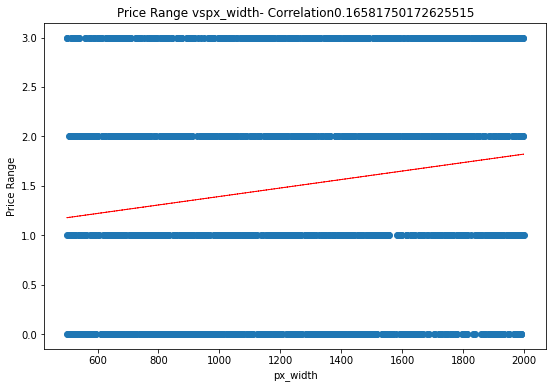

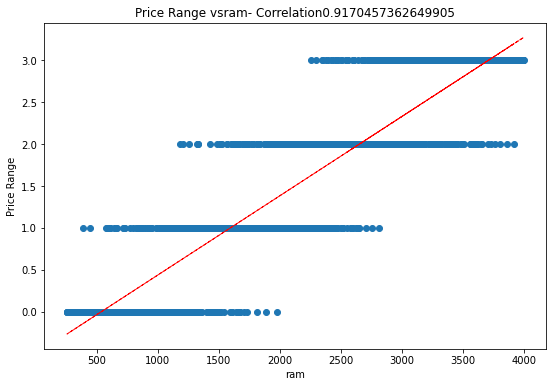

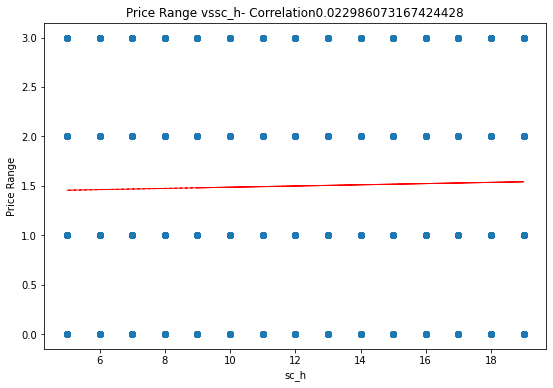

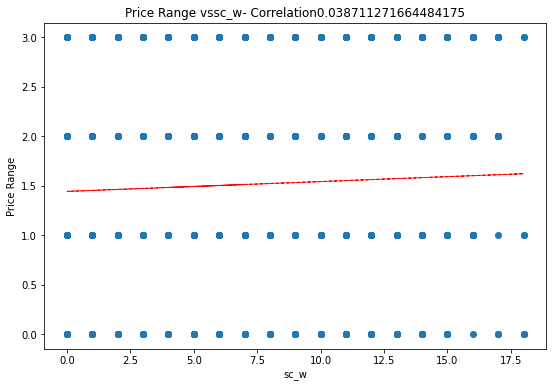

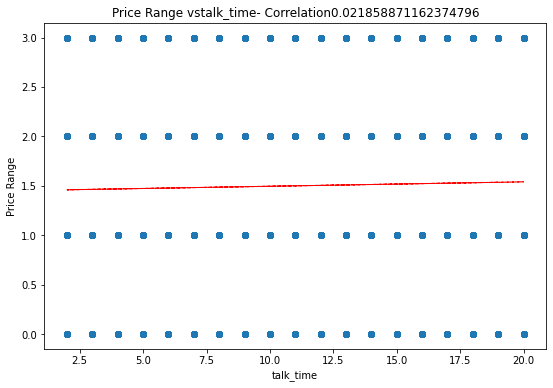

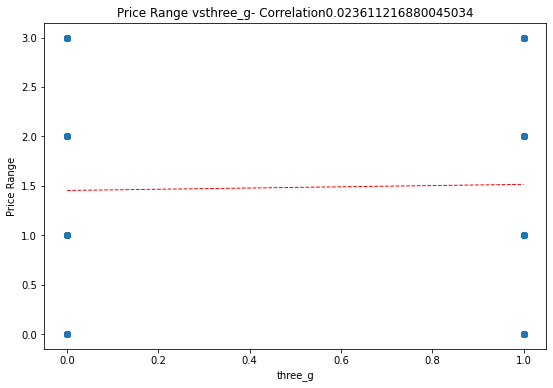

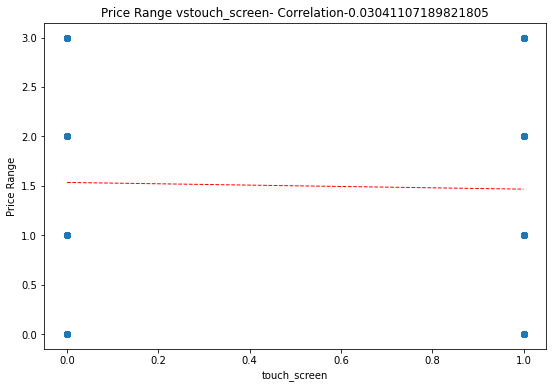

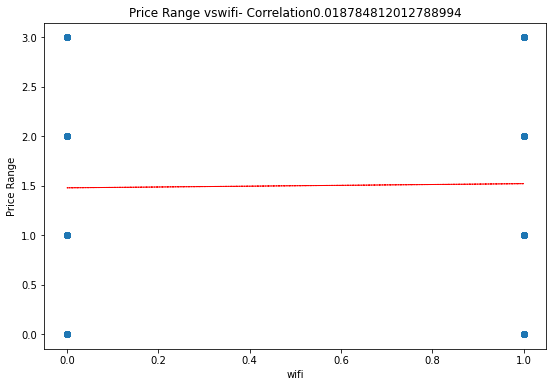

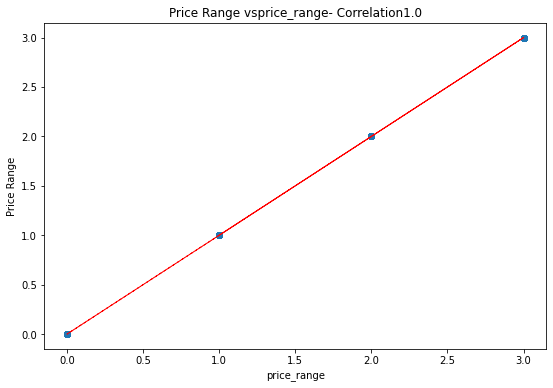

In [ ]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['price_range']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('Price Range')
  ax.set_title('Price Range vs'+ col + '- Correlation' + str(correlation))
  z = np.polyfit(df[col],df['price_range'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col],y_hat,'r--',lw=1)

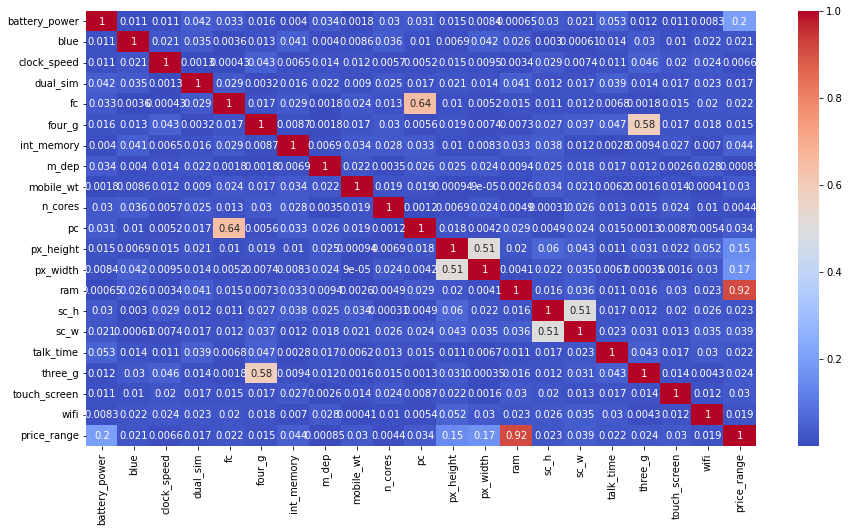

In [ ]:
# Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
# Create a list of independent variables
dependent_variable = 'price_range'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
(independent_variables)

['blue',
 'fc',
 'm_dep',
 'wifi',
 'four_g',
 'pc',
 'mobile_wt',
 'talk_time',
 'sc_w',
 'n_cores',
 'px_width',
 'sc_h',
 'touch_screen',
 'three_g',
 'clock_speed',
 'ram',
 'battery_power',
 'px_height',
 'int_memory',
 'dual_sim']

In [ ]:
# Create the data of independent variables
X = df[independent_variables].values

In [ ]:
# Create the data of dependent variables
y = df[dependent_variable].values

#**Train Test Split**

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [ ]:
print('X_train: ',len(X_train))
print('X_test: ',len(X_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))

X_train:  1600
X_test:  400
y_train:  1600
y_test:  400
